# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\avile\anaconda3\envs\dev\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read your api key environment variable
api_key = os.getenv("NEWS_API")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient

newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q="Bitcoin", language="en", sort_by="relevancy")

In [5]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q="Ethereum", language="en", sort_by="relevancy")

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["Date","Compound","Negative","Neutral","Positive","text"]
btc_df = btc_df[cols]

btc_df.head()

,Date,Compound,Negative,Neutral,Positive,text
0,2021-03-31,0.0772,0.0,0.961,0.039,Whether youre looking to make a larger investm...
1,2021-03-24,0.5859,0.0,0.873,0.127,"As it promised earlier this year, Tesla now ac..."
2,2021-04-13,0.6124,0.0,0.865,0.135,The crypto industry as a whole has seen a mome...
3,2021-03-24,0.3182,0.0,0.935,0.065,The inevitable has happened: You can now purch...
4,2021-03-24,0.2023,0.0,0.950,0.050,Tesla made headlines earlier this year when it...


In [7]:
# Create the ethereum sentiment scores DataFrame
# Create the Bitcoin sentiment scores DataFrame
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["Date","Compound","Negative","Neutral","Positive","text"]
eth_df = eth_df[cols]

eth_df.head()

,Date,Compound,Negative,Neutral,Positive,text
0,2021-03-15,-0.5574,0.11,0.890,0.000,One of the strictest crackdowns worldwide\r\nP...
1,2021-03-31,0.0772,0.00,0.961,0.039,Whether youre looking to make a larger investm...
2,2021-03-15,0.0000,0.00,1.000,0.000,Famed auction house Christies just sold its fi...
3,2021-03-29,0.0000,0.00,1.000,0.000,Payment card network Visa has announced that t...
4,2021-04-13,0.2732,0.00,0.938,0.062,"ConsenSys, a key player in crypto and a major ..."


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.236610,0.028250,0.891400,0.080350
std,0.373060,0.047327,0.079059,0.066469
min,-0.557400,0.000000,0.709000,0.000000
25%,0.038700,0.000000,0.863250,0.047250
50%,0.318200,0.000000,0.911000,0.066500
75%,0.432825,0.054500,0.936250,0.103750
max,0.771700,0.142000,1.000000,0.240000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.00000,20.000000
mean,0.023990,0.033500,0.93000,0.036550
std,0.294225,0.041179,0.07114,0.049016
min,-0.557400,0.000000,0.73500,0.000000
25%,-0.115300,0.000000,0.91475,0.000000
50%,0.000000,0.000000,0.93700,0.000000
75%,0.126200,0.071000,1.00000,0.065000
max,0.565000,0.110000,1.00000,0.172000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had a higher mean positive score of 0.08 compared to Ethereum (0.037)

Q: Which coin had the highest compound score?

A: Bitcoin has the highest compound score 

Q. Which coin had the highest positive score?

A: Bitcoin has the highest positive score

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Expand the default stopwords list if necessary
sw_addon = {'said', 'what', ',','ha','char'}

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Create a list of the words
    sw = set(stopwords.words('english'))
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    lem = [lemmatizer.lemmatize(word) for word in words]
    # Convert the words to lowercase
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    # Remove the stop words
    
    return tokens

Reference Day 1 Activity 2 

In [13]:
# Create a new tokens column for bitcoin
# sentence tokenize 
sentence_tokenized = [sent_tokenize(i) for i in btc_df['text']]

tokens = []

for sentence in sentence_tokenized:
    btc_words = []
    for text in sentence:
        btc_words += tokenizer(text)
    tokens.append(btc_words)
    
btc_df['tokens'] = tokens
btc_df.head()

,Date,Compound,Negative,Neutral,Positive,text,tokens
0,2021-03-31,0.0772,0.0,0.961,0.039,Whether youre looking to make a larger investm...,"[whether, youre, looking, make, larger, invest..."
1,2021-03-24,0.5859,0.0,0.873,0.127,"As it promised earlier this year, Tesla now ac...","[promised, earlier, year, tesla, accepts, paym..."
2,2021-04-13,0.6124,0.0,0.865,0.135,The crypto industry as a whole has seen a mome...,"[crypto, industry, whole, seen, momentous, yea..."
3,2021-03-24,0.3182,0.0,0.935,0.065,The inevitable has happened: You can now purch...,"[inevitable, happened, purchase, tesla, vehicl..."
4,2021-03-24,0.2023,0.0,0.950,0.050,Tesla made headlines earlier this year when it...,"[tesla, made, headline, earlier, year, took, s..."


In [14]:
# Create a new tokens column for ethereum
# sentence tokenize 
sentence_tokenized = [sent_tokenize(i) for i in eth_df['text']]

tokens = []

for sentence in sentence_tokenized:
    eth_words = []
    for text in sentence:
        eth_words += tokenizer(text)
    tokens.append(eth_words)
     
eth_df['tokens'] = tokens
eth_df.head()

,Date,Compound,Negative,Neutral,Positive,text,tokens
0,2021-03-15,-0.5574,0.11,0.890,0.000,One of the strictest crackdowns worldwide\r\nP...,"[one, strictest, crackdown, worldwidephoto, mi..."
1,2021-03-31,0.0772,0.00,0.961,0.039,Whether youre looking to make a larger investm...,"[whether, youre, looking, make, larger, invest..."
2,2021-03-15,0.0000,0.00,1.000,0.000,Famed auction house Christies just sold its fi...,"[famed, auction, house, christies, sold, first..."
3,2021-03-29,0.0000,0.00,1.000,0.000,Payment card network Visa has announced that t...,"[payment, card, network, visa, announced, tran..."
4,2021-04-13,0.2732,0.00,0.938,0.062,"ConsenSys, a key player in crypto and a major ...","[consensys, key, player, crypto, major, propon..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

From Day 1 Activity 8: counter.ipynb file

In [16]:
def bigram_counter(text): 
    # Combine all articles into one large string
    big_string = ' '.join(text)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

In [17]:
# Generate the Bitcoin N-grams where N=2
# bigram_counts = Counter(ngrams(tokenizer(btc_df.text), n=2))
# print(dict(bigram_counts))
bigram_counter(btc_df['text'])

,bigram,count
0,"(earlier, year)",2
1,"(elon, musk)",2
2,"(nonfungible, token)",2
3,"(microstrategy, inc)",2
4,"(inc, major)",2
5,"(major, bitcoin)",2
6,"(bitcoin, corporate)",2
7,"(corporate, backer)",2
8,"(backer, monday)",2
9,"(monday, nonemployee)",2


In [18]:
# Generate the Ethereum N-grams where N=2
bigram_counter(eth_df['text'])

,bigram,count
0,"(nonfungible, token)",3
1,"(ethereum, blockchain)",2
2,"(nft, craze)",2
3,"(cryptocurrency, platform)",2
4,"(damien, hirst)",2
5,"(one, strictest)",1
6,"(strictest, crackdown)",1
7,"(crackdown, worldwidephoto)",1
8,"(worldwidephoto, michele)",1
9,"(michele, doying)",1


In [19]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Get the top 10 words for Bitcoin
btc_top_ten = token_count(btc_words, N=10)
btc_top_ten

[('reuters', 2),
 ('stafflondon', 1),
 ('april', 1),
 ('bitcoin', 1),
 ('hit', 1),
 ('record', 1),
 ('tuesday', 1),
 ('extending', 1),
 ('rally', 1),
 ('new', 1)]

In [21]:
# Get the top 10 words for Ethereum
btc_top_ten = token_count(eth_words, N=10)
btc_top_ten

[('damien', 2),
 ('hirst', 2),
 ('famous', 1),
 ('pickling', 1),
 ('shark', 1),
 ('encrusting', 1),
 ('skull', 1),
 ('diamondschris', 1),
 ('younggetty', 1),
 ('imagessuperstar', 1)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

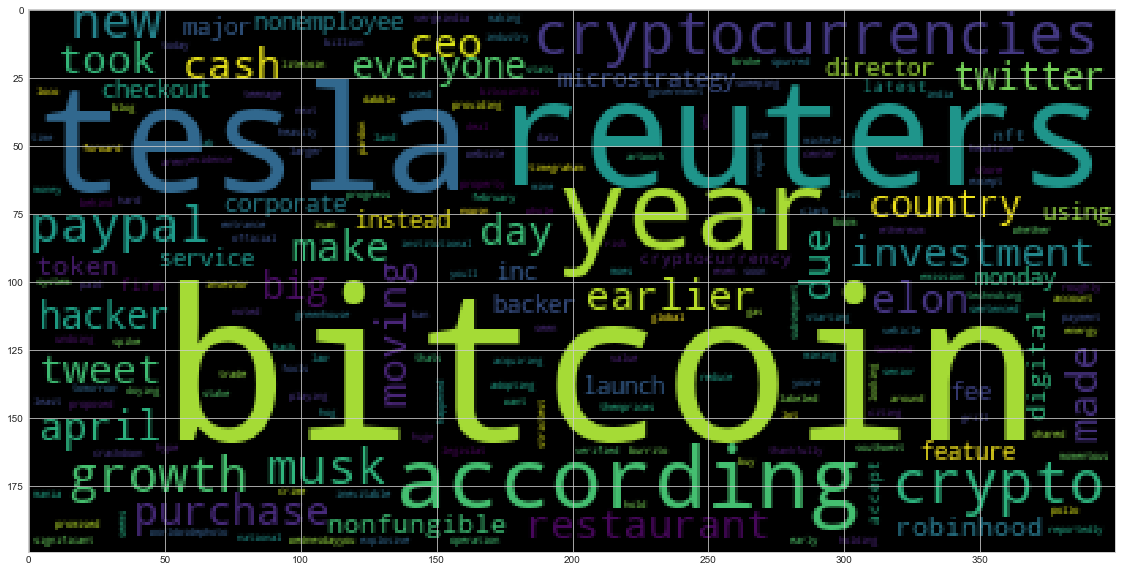

In [23]:
# Process text for wordcloud creation
def process_text(text): 
    # Combine all articles into one large string
    big_string = ' '.join(text)
    processed = tokenizer(big_string)
    return ' '.join(processed)
    
btc_processed = process_text(btc_df['text'])
    
# Generate the Bitcoin word cloud
wc = WordCloud()
img = wc.generate(btc_processed)
plt.imshow(img)

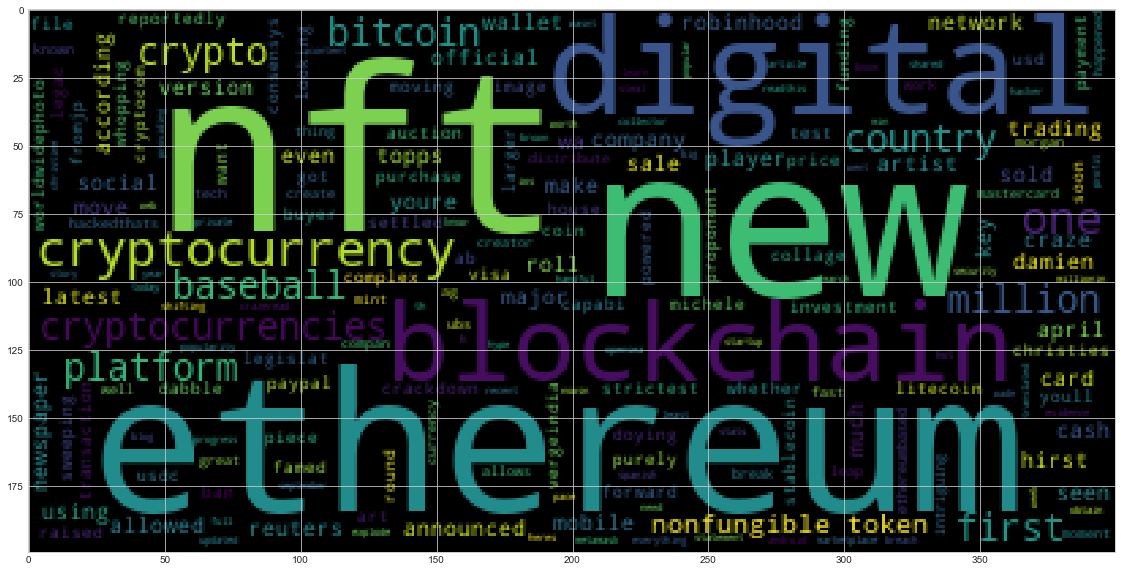

In [24]:
# Generate the Ethereum word cloud
eth_processed = process_text(eth_df['text'])
    
# Generate the Bitcoin word cloud
wc = WordCloud()
img = wc.generate(eth_processed)
plt.imshow(img)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [25]:
import spacy
from spacy import displacy

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [28]:
# Concatenate all of the bitcoin text together

all_btc_text = []

for sentence in btc_df['text']:
    all_btc_text.append(sentence)
    
btc_concat = ' '.join(all_btc_text)

In [29]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_concat)

# Add a title to the document
btc_ner.user_data['title'] = 'Bitcoin NER'

In [30]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [31]:
# List all Entities
print([(ent, ent.label_) for ent in btc_ner.ents])

[(Bitcoin, Ethereum, 'ORG'), (Bitcoin Cash, 'PERSON'), (earlier this year, 'DATE'), (Tesla, 'ORG'), (Bitcoin, 'PERSON'), (Tesla, 'ORG'), (Elon Musk, 'PERSON'), (Musk, 'PERSON'), (Tesla, 'ORG'), (a momentous year, 'DATE'), (2020, 'DATE'), (Tesla, 'ORG'), (Bitcoin, 'PERSON'), (Elon Musk, 'PERSON'), (Wednesday, 'DATE'), (earlier this year, 'DATE'), (roughly $1.5 billion, 'MONEY'), (early February, 'DATE'), (SEC, 'ORG'), (National Burrito Day, 'EVENT'), (April Fools Day, 'DATE'), (this year, 'DATE'), (tomorrow, 'DATE'), (Pollo Loco, 'FAC'), (Photo, 'PERSON'), (Michele Doying, 'PERSON'), (India, 'GPE'), (Reuters, 'ORG'), (last years, 'DATE'), (Twitter, 'PRODUCT'), (Graham Ivan Clark, 'PERSON'), (Twitters, 'NORP'), (India, 'GPE'), (Reuters, 'ORG'), (a big year, 'DATE'), (Robinhood, 'ORG'), (today, 'DATE'), (Christine Brown, 'PERSON'), (Robinhoods, 'PERSON'), (Reuters, 'ORG'), (Reuters, 'ORG'), (Inc, 'PERSON'), (Monday, 'DATE'), (this morning, 'TIME'), (millions, 'CARDINAL'), (Reuters, 'ORG')

---

## Ethereum NER

In [32]:
# Concatenate all of the ethereum text together
all_eth_text = []

for sentence in eth_df['text']:
    all_eth_text.append(sentence)
    
eth_concat = ' '.join(all_eth_text)

In [33]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_concat)

# Add a title to the document
eth_ner.user_data['title'] = 'Ethereum NER'

In [34]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [35]:
# List all Entities
print([(ent, ent.label_) for ent in eth_ner.ents])

[(One, 'CARDINAL'), (Photo, 'PERSON'), (Michele Doying, 'PERSON'), (India, 'GPE'), (Reuters, 'ORG'), (Bitcoin, Ethereum, 'ORG'), (Bitcoin Cash, 'PERSON'), (Christies, 'ORG'), (first, 'ORDINAL'), ($69 million, 'MONEY'), (5,000, 'CARDINAL'), (Visa, 'ORG'), (USD Coin, 'ORG'), (Ethereum, 'ORG'), (Crypto.com, 'ORG'), (first, 'ORDINAL'), (ConsenSys, 'ORG'), (Ethereum, 'ORG'), ($65 million, 'MONEY'), (J.P. Morgan, 'PERSON'), (Mastercard, 'PERSON'), (UBS AG, 'ORG'), (Ethereum, 'ORG'), (NFT, 'ORG'), (NFT, 'ORG'), (recent weeks, 'DATE'), (MetaMask, 'PRODUCT'), (one, 'CARDINAL'), (Ethereum, 'ORG'), (September 2020, 'DATE'), (about $5.7 million, 'MONEY'), (a big year, 'DATE'), (Robinhood, 'ORG'), (today, 'DATE'), (Christine Brown, 'PERSON'), (Robinhoods, 'PERSON'), (26, 2021, 'DATE'), (Spanish, 'NORP'), (AI, 'ORG'), (New York Times, 'ORG'), (daily, 'DATE'), (Topps, 'GPE'), (first, 'ORDINAL'), (NFT, 'ORG'), (36.32, 'MONEY'), (April 3, 'DATE'), (90%, 'PERCENT'), (as much as 8%, 'PERCENT'), (Tuesday,